In [1]:
import pandas as pd
import json

In [2]:
df = pd.read_json("gpt2_base_stereoset", orient="columns")
df

ValueError: Expected object or value

In [3]:
predictions = json.load(open("code/predictions-all.json"))

In [4]:
predictions.keys()

dict_keys(['gpt2-medium', 'gpt2', 'gpt2-large', 'gpt2-biased', 'gpt2-gender', 'gpt2-redditbias'])

In [6]:
dfs = []
for key in predictions.keys():
    df_tmp = pd.DataFrame.from_dict(predictions[key]['intrasentence']).T.rename(columns={'SS Score': key})
    dfs.append(df_tmp[key])

In [9]:
dfs_icat = []
for key in predictions.keys():
    df_tmp = pd.DataFrame.from_dict(predictions[key]['intrasentence']).T.rename(columns={'ICAT Score': key})
    dfs_icat.append(df_tmp[key])

In [10]:
df = pd.DataFrame(dfs).T
df_icat = pd.DataFrame(dfs_icat).T

In [11]:
pd.DataFrame.from_dict(predictions['gpt2']['intrasentence']).T

,Count,LM Score,SS Score,ICAT Score
gender,765.0,93.277908,62.667774,69.645439
profession,2430.0,92.289354,63.974686,66.495058
race,2886.0,89.756707,60.350001,71.177067
religion,237.0,88.459770,58.022989,74.265536
overall,2106.0,91.114943,61.931485,69.372211


In [12]:
pd.DataFrame.from_dict(predictions['gpt2-biased']['intrasentence']).T

,Count,LM Score,SS Score,ICAT Score
gender,765.0,92.418415,67.047302,60.908722
profession,2430.0,93.948655,69.536551,57.240000
race,2886.0,92.620470,66.000102,62.981731
religion,237.0,88.551724,66.022989,60.174459
overall,2106.0,92.944758,67.476483,60.457807


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

# plt.rc('axes', labelsize=15)   # fontsize of the x and y labels
# plt.rc('axes', titlesize=15)
# plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=14)
# plt.rc('legend', fontsize=15)    # legend fontsize
# plt.rc('figure', titlesize=16)   # fontsize of the figure title
# plt.rc('lines', markersize=7)
# plt.rc('lines', linewidth=2)


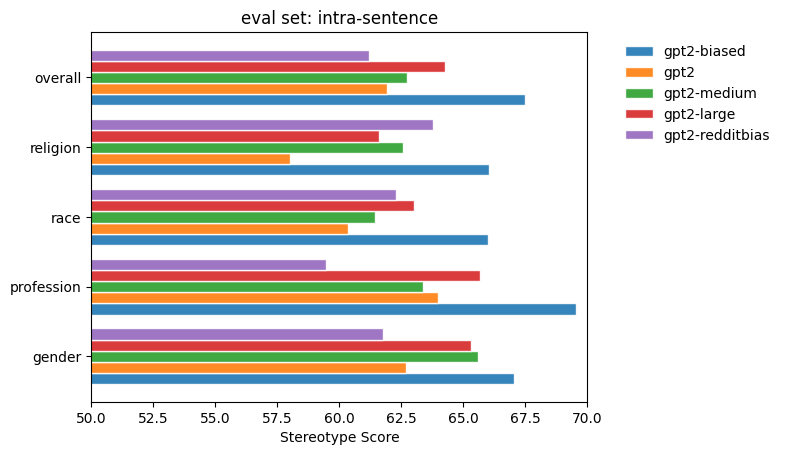

In [16]:
cols = ['gpt2-biased', 'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-redditbias']

fig, ax = plt.subplots(1, 1)
df[cols].plot(ax=ax, kind="barh", width=0.8, alpha=0.9, edgecolor='w', linewidth=1)
plt.xlim(50, 70)
ax.set_xlabel("Stereotype Score")
plt.legend(framealpha=0.0, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("eval set: intra-sentence")
plt.show()

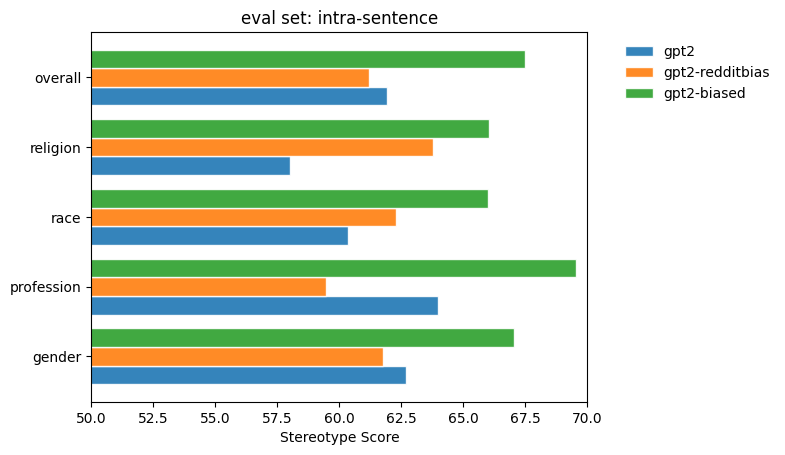

In [17]:
cols = ['gpt2', 'gpt2-redditbias', 'gpt2-biased']

fig, ax = plt.subplots(1, 1)
df[cols].plot(ax=ax, kind="barh", width=0.8, alpha=0.9, edgecolor='w', linewidth=1)
plt.xlim(50, 70)
ax.set_xlabel("Stereotype Score")
plt.legend(framealpha=0.0, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("eval set: intra-sentence")
plt.show()

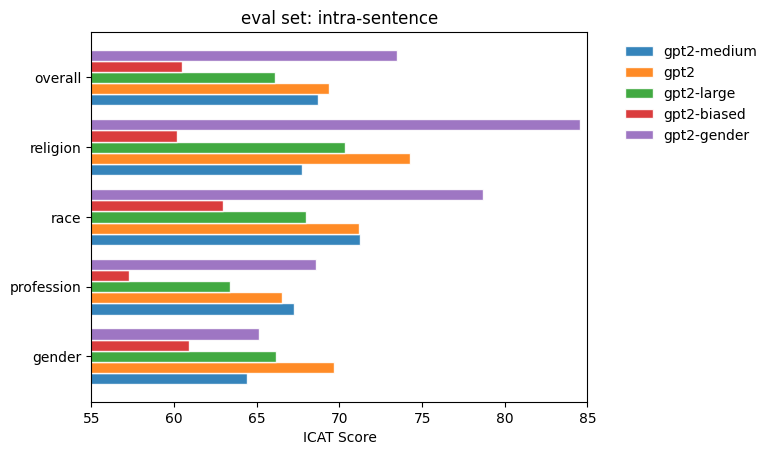

In [36]:
fig, ax = plt.subplots(1, 1)
df_icat.plot(ax=ax, kind="barh", width=0.8, alpha=0.9, edgecolor='w', linewidth=1)
plt.xlim(55, 85)
ax.set_xlabel("ICAT Score")
plt.legend(framealpha=0.0, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("eval set: intra-sentence")
plt.show()

In [ ]:
python3 eval_generative_models.py --pretrained-class bigscience/bloom-560m --intrasentence-model BloomModel --intersentence-model ModelNSP --tokenizer BloomTokenizerFast --max-seq-length 128 --intrasentence-load-path ../bloom-560m --batch-size 1 --input-file ../data/dev.json --output-dir predictions/